In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("iphone_purchase_data.csv")
df.head(4)

,Gender,Age,Salary,Purchase_iPhone
0,Female,29,30247,Yes
1,Male,21,65024,No
2,Male,32,94703,No
3,Female,26,102509,Yes


In [3]:
le=LabelEncoder()
df['Purchase_iPhone']=le.fit_transform(df['Purchase_iPhone'])
df['Gender']=le.fit_transform(df['Gender'])
print(df.head(5).to_string())

   Gender  Age  Salary  Purchase_iPhone
0       0   29   30247                1
1       1   21   65024                0
2       1   32   94703                0
3       0   26  102509                1
4       0   24   92351                0


In [4]:
df['Gender'].value_counts()

Gender
1    5049
0    4951
Name: count, dtype: int64

In [5]:
# Features and target
x = df.drop('Purchase_iPhone', axis=1)
y = df['Purchase_iPhone']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Model save karna
with open("iphone_model.pkl", "wb") as f:
    pickle.dump(model, f)


# Predict
y_predict = model.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 0, 1], shape=(2000,))

In [6]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.4905

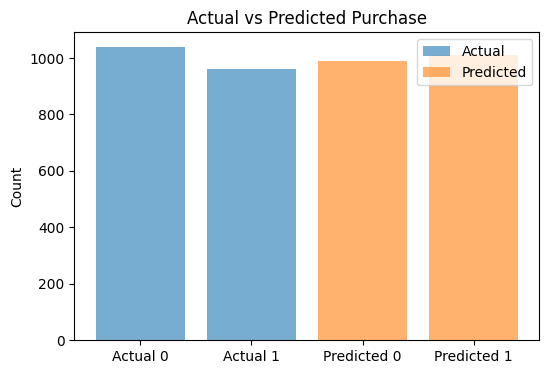

In [7]:
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_predict, index=y_test.index).value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
plt.bar(['Actual 0', 'Actual 1'], actual_counts, alpha=0.6, label='Actual')
plt.bar(['Predicted 0', 'Predicted 1'], predicted_counts, alpha=0.6, label='Predicted')
plt.ylabel("Count")
plt.title("Actual vs Predicted Purchase")
plt.legend()
plt.show()